
# **Imports**

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.core.numeric import full
import seaborn as sns
import scipy.stats as st
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler



from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor


from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# **Data Loading**

In [56]:
train_data = pd.read_csv("/content/Train.csv")
#train_data

In [57]:
test_data = pd.read_csv("/content/Test.csv")
#test_data

# **Combining the datasets**


In [58]:
#marking each set as a train or test dataset
train_data['Data']='train' 
test_data['Data']='test'

#filling a outlet sales colum in the test dataset with NAN values
test_data['Item_Outlet_Sales']=np.nan

#combining the train and test dataset to apply the preprocessing to both of them simultaneously then separte them 
full_data=pd.concat([train_data,test_data],ignore_index=True,sort=False)
#full_data

# **Data Visualization and Preprocessing**

In [59]:
full_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Data
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


categorical columns:

1.   Item_Fat_Content
2.   Item_type
3.   Outlet_Size
4.   Outlet_Location_Type
5.   Outlet_Type



In [60]:
full_data.info()
full_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Data                       14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


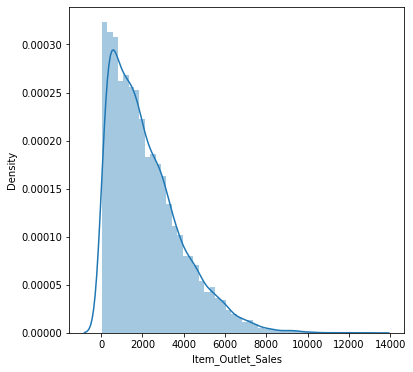

In [61]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(full_data['Item_Outlet_Sales'])
plt.show()

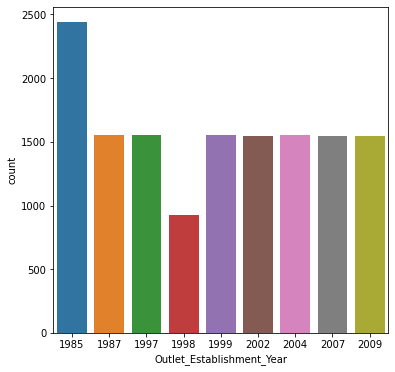

In [62]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=full_data)
plt.show()

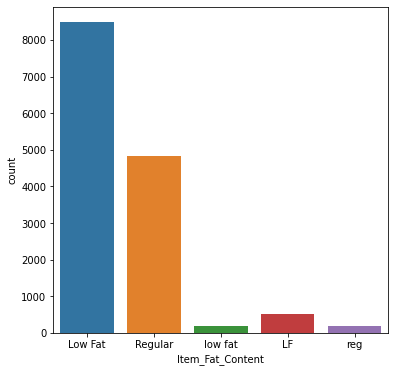

In [63]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=full_data)
plt.show()

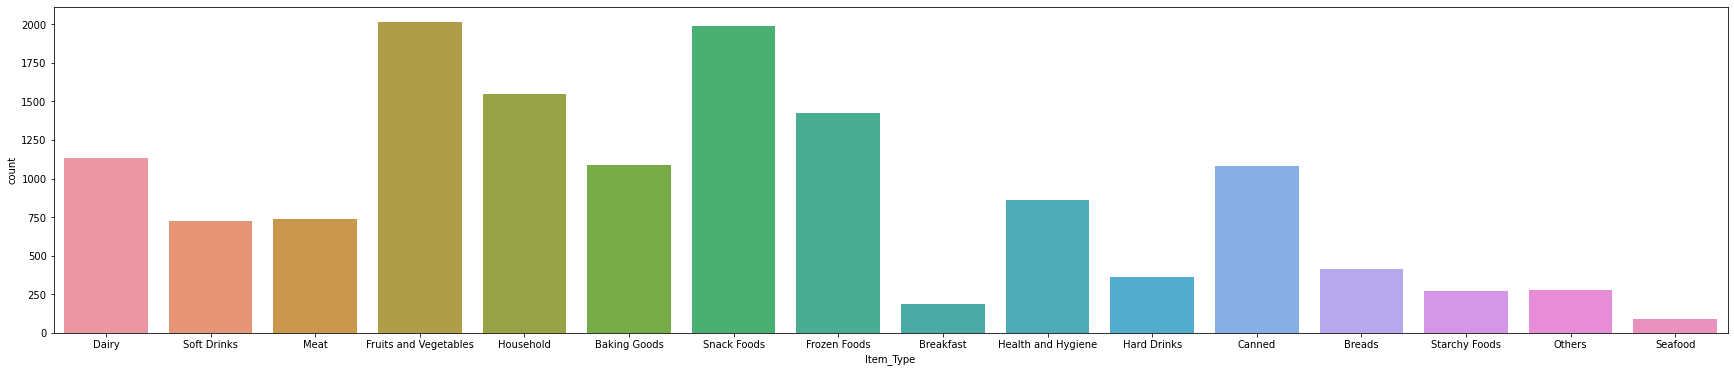

In [64]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=full_data)
plt.show()

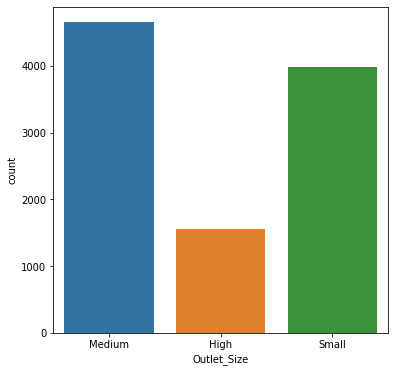

In [65]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=full_data)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


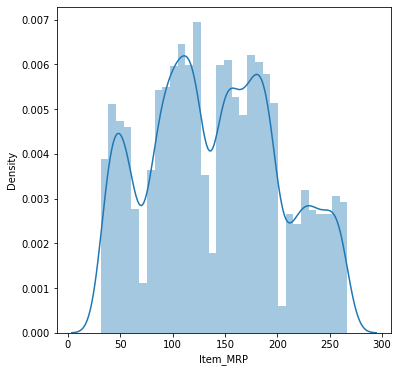

In [66]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(full_data['Item_MRP'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


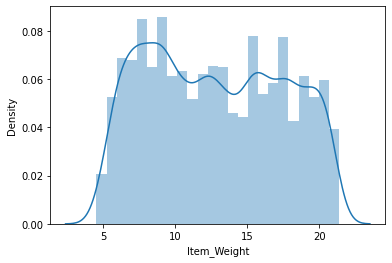

In [67]:
sns.distplot(full_data['Item_Weight'].dropna())
#missing values can be replaced with mean since it's normally distributed

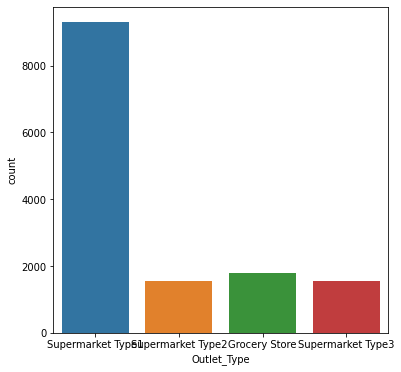

In [68]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Type', data=full_data)
plt.show()

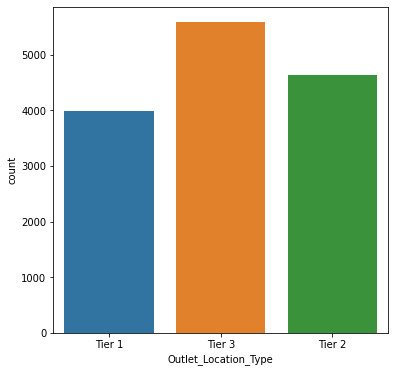

In [69]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Location_Type', data=full_data)
plt.show()

In [70]:
full_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Data                            0
dtype: int64

In [71]:
#imputing the missing weights with the mean weight
full_data['Item_Weight']=full_data.groupby('Item_Identifier')['Item_Weight'].transform(lambda x:x.fillna(x.mean()))

In [72]:

# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size =full_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [73]:
print(mode_of_Outlet_size)


Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [74]:
miss_values = full_data['Outlet_Size'].isnull()   

In [75]:
full_data.loc[miss_values, 'Outlet_Size'] = full_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [76]:
full_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Data                            0
dtype: int64

In [77]:
#checking for different spellings in the fat content column
full_data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [78]:
#make the values consistent acroos the dataframe
full_data['Item_Fat_Content']=full_data['Item_Fat_Content'].replace(['low fat'],['Low Fat'])
full_data['Item_Fat_Content']=full_data['Item_Fat_Content'].replace(['LF'],['Low Fat'])
full_data['Item_Fat_Content']=full_data['Item_Fat_Content'].replace(['reg'],['Regular'])

full_data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [79]:
#checking the visibility values
full_data["Item_Visibility"].describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


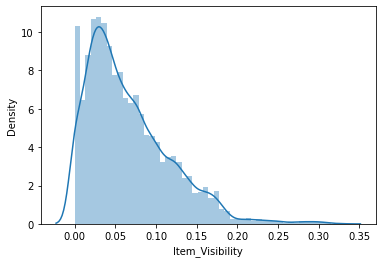

In [80]:
sns.distplot(full_data['Item_Visibility'])

In [81]:
#replacing the value of 0 in the visibility with the most common value (median)
median_vis = full_data['Item_Visibility'].median(skipna=True)
print(median_vis)
full_data['Item_Visibility']=full_data.Item_Visibility.mask(full_data.Item_Visibility == 0,median_vis)

# full_data.Item_Visibility=full_data.groupby('Item_Identifier')['Item_Visibility'].transform(lambda x:x.replace(0,x.median()))

full_data["Item_Visibility"].describe()

0.054020536499999994


count    14204.000000
mean         0.069296
std          0.048749
min          0.003575
25%          0.033143
50%          0.054023
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [82]:
#adding new features to have a real indication about the item sales
#price per weight unit to indicate the real value for the item
full_data['Price_Per_Weight_Unit']=full_data.Item_MRP/full_data.Item_Weight

In [83]:
#scaling the years associated with each outlet establishment year by subtracting them by 2013 (the most recent year used in the dataset)
full_data['Years']=2013-full_data.Outlet_Establishment_Year
#droping the establishment year column as it was replaced with years column
full_data.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)
full_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Data,Price_Per_Weight_Unit,Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,train,26.861204,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,train,8.153581,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,train,8.092457,14
3,FDX07,19.20,Regular,0.054021,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,train,9.484115,15
4,NCD19,8.93,Low Fat,0.054021,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,train,6.031512,26


In [84]:
for idx,i in full_data.Item_Identifier.iteritems():
    if i[0:2] == 'NC':
       full_data.loc[idx,'Item_Fat_Content']='None'
full_data['Item_Fat_Content'].unique()


array(['Low Fat', 'Regular', 'None'], dtype=object)

In [85]:
# for idx,i in full_data.Item_Identifier.iteritems():
#     if i[0:2] == 'FD':
#        full_data.loc[idx,'Item_Type']='Food'

# for idx,i in full_data.Item_Identifier.iteritems():
#     if i[0:2] == 'DR':
#        full_data.loc[idx,'Item_Type']='Drink'

# for idx,i in full_data.Item_Identifier.iteritems():
#     if i[0:2] == 'NC':
#        full_data.loc[idx,'Item_Type']='Other'


In [86]:
full_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Data,Price_Per_Weight_Unit,Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,train,26.861204,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,train,8.153581,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,train,8.092457,14
3,FDX07,19.20,Regular,0.054021,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,train,9.484115,15
4,NCD19,8.93,None,0.054021,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,train,6.031512,26


In [87]:
full_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Data,Price_Per_Weight_Unit,Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,train,26.861204,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,train,8.153581,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,train,8.092457,14
3,FDX07,19.20,Regular,0.054021,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,train,9.484115,15
4,NCD19,8.93,None,0.054021,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,train,6.031512,26


In [88]:
#encoding categorical values
ordinal = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']
onehot = ['Item_Type', 'Outlet_Type']

full_data = pd.get_dummies(full_data,columns=onehot,drop_first=True)
full_data[ordinal] = OrdinalEncoder().fit_transform(full_data[ordinal])


full_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Data,...,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.0,0.016047,249.8092,OUT049,1.0,0.0,3735.1380,train,...,0,0,0,0,0,0,0,1,0,0
1,DRC01,5.92,2.0,0.019278,48.2692,OUT018,1.0,2.0,443.4228,train,...,0,0,0,0,0,1,0,0,1,0
2,FDN15,17.50,0.0,0.016760,141.6180,OUT049,1.0,0.0,2097.2700,train,...,0,1,0,0,0,0,0,1,0,0
3,FDX07,19.20,2.0,0.054021,182.0950,OUT010,2.0,2.0,732.3800,train,...,0,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,1.0,0.054021,53.8614,OUT013,0.0,2.0,994.7052,train,...,1,0,0,0,0,0,0,1,0,0


In [89]:
#separting the test from the train data after the preprocessing
train=full_data.loc[full_data['Data']=='train']
test=full_data.loc[full_data['Data']=='test']
train=train.drop('Data',axis=1)
test=test.drop(['Data','Item_Outlet_Sales'],axis=1)

In [90]:
train.skew()

<ipython-input-90-1d3a3c99b9d6>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.skew()


Item_Weight                         0.071014
Item_Fat_Content                    0.211160
Item_Visibility                     1.318779
Item_MRP                            0.127202
Outlet_Size                        -0.861866
Outlet_Location_Type               -0.209093
Item_Outlet_Sales                   1.177531
Price_Per_Weight_Unit               1.296282
Years                               0.396641
Item_Type_Breads                    5.567533
Item_Type_Breakfast                 8.632562
Item_Type_Canned                    3.196644
Item_Type_Dairy                     3.096356
Item_Type_Frozen Foods              2.659119
Item_Type_Fruits and Vegetables     2.021988
Item_Type_Hard Drinks               6.071724
Item_Type_Health and Hygiene        3.668801
Item_Type_Household                 2.547106
Item_Type_Meat                      4.136741
Item_Type_Others                    6.889767
Item_Type_Seafood                  11.411629
Item_Type_Snack Foods               2.065882
Item_Type_

In [91]:
test.skew()


<ipython-input-91-a57c8b9f9d04>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test.skew()


Item_Weight                         0.144796
Item_Fat_Content                    0.197003
Item_Visibility                     1.403304
Item_MRP                            0.136182
Outlet_Size                        -0.861894
Outlet_Location_Type               -0.209049
Price_Per_Weight_Unit               1.316871
Years                               0.396306
Item_Type_Breads                    5.610422
Item_Type_Breakfast                 8.473575
Item_Type_Canned                    3.185600
Item_Type_Dairy                     3.099217
Item_Type_Frozen Foods              2.661190
Item_Type_Fruits and Vegetables     2.106119
Item_Type_Hard Drinks               5.952360
Item_Type_Health and Hygiene        3.725356
Item_Type_Household                 2.456438
Item_Type_Meat                      3.915724
Item_Type_Others                    6.944464
Item_Type_Seafood                  14.978748
Item_Type_Snack Foods               2.088981
Item_Type_Soft Drinks               4.156711
Item_Type_

In [92]:
#applying boxcox normalization to handle the skews to specific columns

skewed_col=['Item_Weight', 'Item_Visibility', 'Item_MRP','Price_Per_Weight_Unit','Years']
for i in skewed_col:
    train[i]=list(st.boxcox(train[i]+1)[0])
    test[i]=list(st.boxcox(test[i]+1)[0])


#scaling numerical values
scal_col=['Item_Weight', 'Item_Visibility', 'Item_MRP','Price_Per_Weight_Unit']

for i in scal_col:
  train[i] = StandardScaler().fit_transform(train[[i]])
  test[i] = StandardScaler().fit_transform(test[[i]])

In [93]:
target = 'Item_Outlet_Sales'
IDs = ['Item_Identifier','Outlet_Identifier']
predictors = [x for x in train.columns if x not in [target]+IDs]

# **Modeling**

In [94]:
from sklearn import model_selection
#function to train the model and cross validate it then export the final file submission
def modelfit(model, train, test, predictors, target, ID_col, filename):
   
    #Fitting the model on the training data
    model.fit(train[predictors], train[target])
        
    #Predictions from training set:
    train_predictions = model.predict(train[predictors])

    #cross-validation:
    cv_score = cross_val_score(model, train[predictors], train[target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values, train_predictions)))
    
    #Prediction on the testing data:
    test[target] = model.predict(test[predictors])
    
    #Export submission file:
    ID_col.append(target)
    submission = pd.DataFrame({ x: test[x] for x in ID_col})
    submission.to_csv(filename, index=False)

In [95]:
#model 1
model_1 = LinearRegression()
modelfit(model_1, train, test, predictors, target, IDs, 'linear.csv')



Model Report
RMSE : 1128


In [96]:
#model_2
model_2 = Ridge(alpha=0.05)
modelfit(model_2, train, test, predictors, target, IDs, 'Ridge.csv')



Model Report
RMSE : 1128


In [97]:
#model 3
model_3 = RandomForestRegressor(n_estimators=500,max_depth=10, min_samples_leaf=20,n_jobs=4,min_samples_split=10)
modelfit(model_3, train, test, predictors, target, IDs, 'RFR1.csv')



Model Report
RMSE : 1002


In [98]:
#model 4
model_4 = RandomForestRegressor(n_estimators=1000,max_depth=20, min_samples_leaf=10,min_samples_split=10,n_jobs=4)
modelfit(model_4, train, test, predictors, target, IDs, 'RFR2.csv')



Model Report
RMSE : 906.1


In [99]:
#model 5
model_5 = XGBRegressor(n_estimators=500, max_depth=15, objective ='reg:squarederror')
modelfit(model_5, train, test, predictors, target, IDs, 'XGBoost.csv')



Model Report
RMSE : 9.013
